# Amazon Reviews for Echo - Decision Trees & Random Forest
In this module, we will look at a dataset from Kaggle of around 3000 customer reviews on Amazon of Amazon Alexa products like Amazon Echo, Echo Dots, etc. where we will have the information of reviews, star ratings, the date of the review, variants, and feedback. We want to discover insights into customer reviews and perform a type of sentiment analysis on our data. The dataset comes from http://www.kaggle.com/sid321axn/amazon-alexa-reviews

### Import Libraries & Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [3]:
df = pd.read_csv('./amazon_alexa.tsv', sep = '\t')

In [4]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
df.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

## Exploratory Data Analysis (EDA)

In [7]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [8]:
df_pos = df[df['feedback']==1]
df_neg = df[df['feedback']==0]

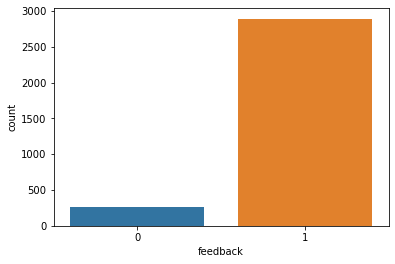

In [9]:
sns.countplot(df['feedback'], label = 'Count')

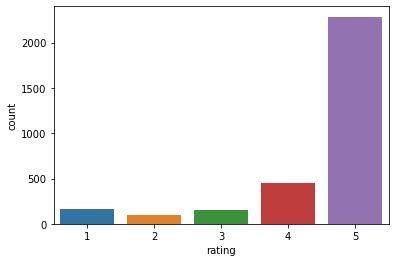

In [10]:
sns.countplot(x='rating', data=df, label='Count')

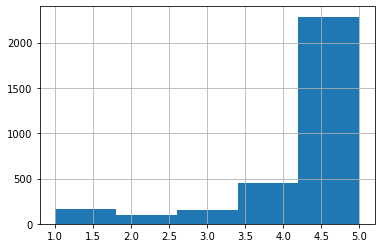

In [11]:
df['rating'].hist(bins=5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

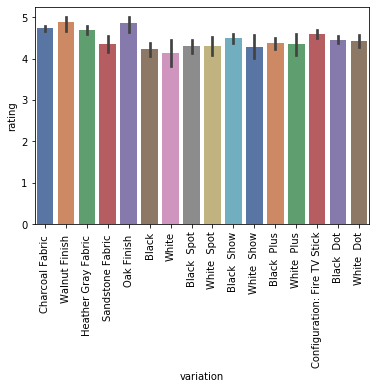

In [12]:
sns.barplot(x='variation', y='rating', data=df, palette='deep')
plt.xticks(rotation=90)

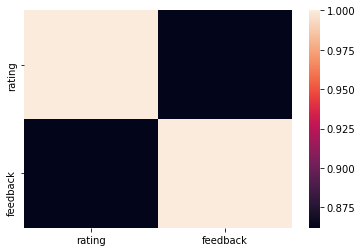

In [13]:
sns.heatmap(df.corr())

We can see that there is a strong correlation between rating and feedback, which makes a lot of sense that if we have high feedback, we have high rating, vice-versa. Actually, one of these should be our target class, as opposed to one of our features.

## Data Cleaning/Feature Engineering

We can drop the date column since we will not do any time series analysis. That may be very interesting to do in another setting, but for the sake of our analysis, we will skip over this. We will also drop the column rating since we will use the feedback column as our binary categories instead of rating. We could use rating in another analysis and end up with 5 target classes, but for the sake of this example, we will use the binary classes of feedback as our target.

In [14]:
df = df.drop(['date', 'rating'], axis = 1)

Let's encode our variation column:

In [15]:
variation_dummies = pd.get_dummies(df['variation'], drop_first= True)

In [16]:
df.drop(['variation'], axis=1, inplace=True)

In [17]:
df = pd.concat([df, variation_dummies], axis=1)

In [18]:
df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


We will convert our text into text counter. There are many advanced implementations, but we will use the text count vectorizer from sci-kit learn.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df_cv = vectorizer.fit_transform(df['verified_reviews'])

In [24]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [26]:
print(df_cv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


We've now converted our text counter into values. Let's now add it to our dataset and drop our original reviews column:

In [27]:
df.drop(['verified_reviews'], axis=1, inplace=True)

In [30]:
encoded_reviews = pd.DataFrame(df_cv.toarray())

In [33]:
df = pd.concat([df, encoded_reviews], axis=1)

## Model Creation and Training

In [32]:
X = df.drop(['feedback'], axis=1)
y = df['feedback']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train.shape

(2520, 4059)

In [36]:
X_test.shape

(630, 4059)

In [37]:
y_train.shape

(2520,)

In [38]:
y_test.shape

(630,)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Model Evaluation

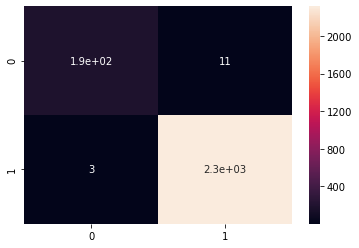

In [45]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

In [46]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       202
           1       1.00      1.00      1.00      2318

    accuracy                           0.99      2520
   macro avg       0.99      0.97      0.98      2520
weighted avg       0.99      0.99      0.99      2520



We see some extremely high scores for our classification report. This looks good, but makes us concerned for overfitting. Let's check our test set.

In [47]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

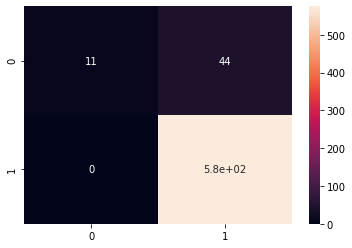

In [48]:
sns.heatmap(cm, annot=True)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        55
           1       0.93      1.00      0.96       575

    accuracy                           0.93       630
   macro avg       0.96      0.60      0.65       630
weighted avg       0.94      0.93      0.91       630



With a huge change in scores, we can easily tell that our random forest model overfit to our training dataset.

## Improving our Model
Let's take a look again at our original dataset.

In [50]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [51]:
df = pd.concat([df, pd.DataFrame(df_cv.toarray())], axis = 1)

In [52]:
df

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's add the feature of "length of review". Intuitively, people who write longer reviews may be related to feedback.

In [54]:
df['length'] = df['verified_reviews'].apply(len)

In [55]:
df

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380


In [56]:
X = df.drop(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], axis=1)

In [57]:
y = df['feedback']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

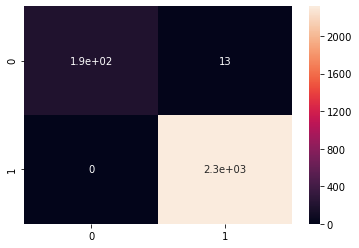

In [59]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

In [60]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       204
           1       0.99      1.00      1.00      2316

    accuracy                           0.99      2520
   macro avg       1.00      0.97      0.98      2520
weighted avg       0.99      0.99      0.99      2520



In [61]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

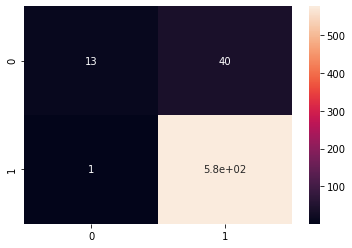

In [62]:
sns.heatmap(cm, annot=True)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.25      0.39        53
           1       0.94      1.00      0.97       577

    accuracy                           0.93       630
   macro avg       0.93      0.62      0.68       630
weighted avg       0.93      0.93      0.92       630



There is a slight improvement with this final model having included an extra feature.